### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Multicollinearity
 3. Variance Inflation Factor



---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1niw1N9m_B8RuLfVwrh-WmKyA7hBU_qDS

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project67** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the yearly amount spent by the customers in shopping from an Ecommerce website. Find out if there exists multicollinearity in the dataset using Variance Inflation Factor.






---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Exploratory Data Analysis

**Activity 3:** Train-Test Split

**Activity 4:** Model Training using `statsmodels.api`

**Activity 5:** Calculate VIF using `variance_inflation_factor`




---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **ecommerce-customers** dataset using the below link. This dataset consists of following columns:

|Columns|Description|
|--|--|
|Email|Email ID of the customer|
|Address|Address of the customer|
|Avatar|Color Avatar|
|Avg. Session Length|Average session of in-store style advice sessions|
|Time on App|Average time spent on App in minutes |
|Time on Website|Average time spent on Website in minutes |
|Length of Membership|How many years the customer has been a member|
|Yearly Amount Spent|Amount spent on items yearly|



   **Dataset Link:**  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ecommerce-customers.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.
- Also, drop the columns `Email`, `Address` and `Avatar` as they are not required for further analysis.

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/ecommerce-customers.csv")
# Print first five rows using head() function
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
# Drop unnecessary columns
df.drop(columns = 'Email',axis = 1,inplace =True)
df.drop(columns = 'Address',axis = 1,inplace =True)
df.drop(columns = 'Avatar',axis = 1,inplace =True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


---

#### Activity 2: Exploratory Data Analysis

Create the scatter plots between each independent variables and the target variable. Determine which independent variable(s) shows linear relationship with the target variable `Yearly Amount Spent`.

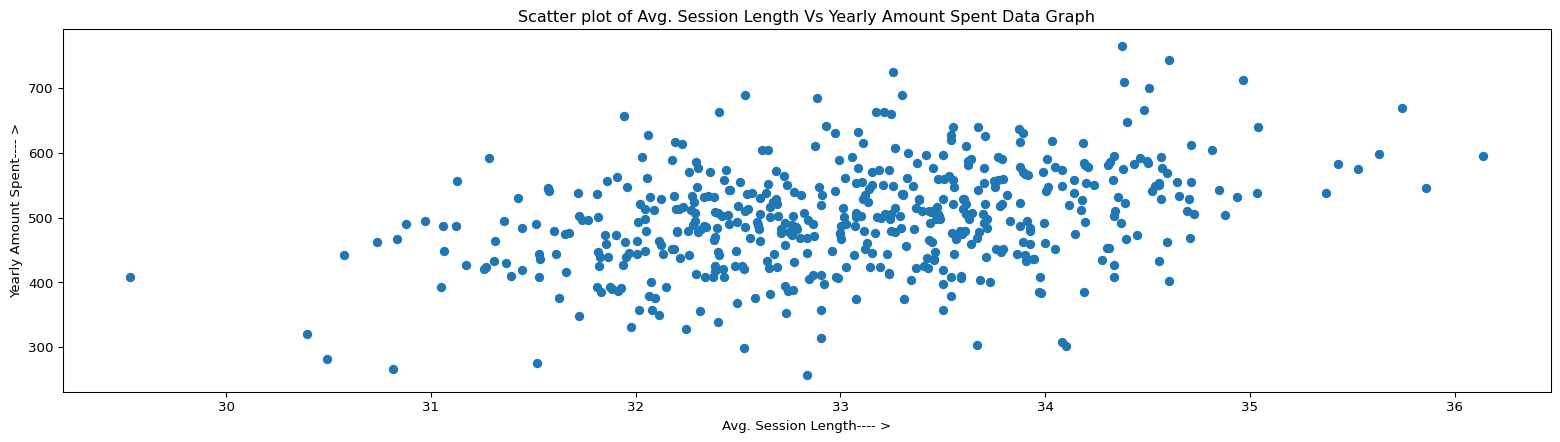

In [ ]:
# Create scatter plot with 'Avg. Session Length' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(20,5),dpi = 96)
plt.title("Scatter plot of Avg. Session Length Vs Yearly Amount Spent Data Graph")
plt.scatter(x = df['Avg. Session Length'],y = df['Yearly Amount Spent'])
plt.xlabel("Avg. Session Length---- >")
plt.ylabel("Yearly Amount Spent---- >")
plt.show()

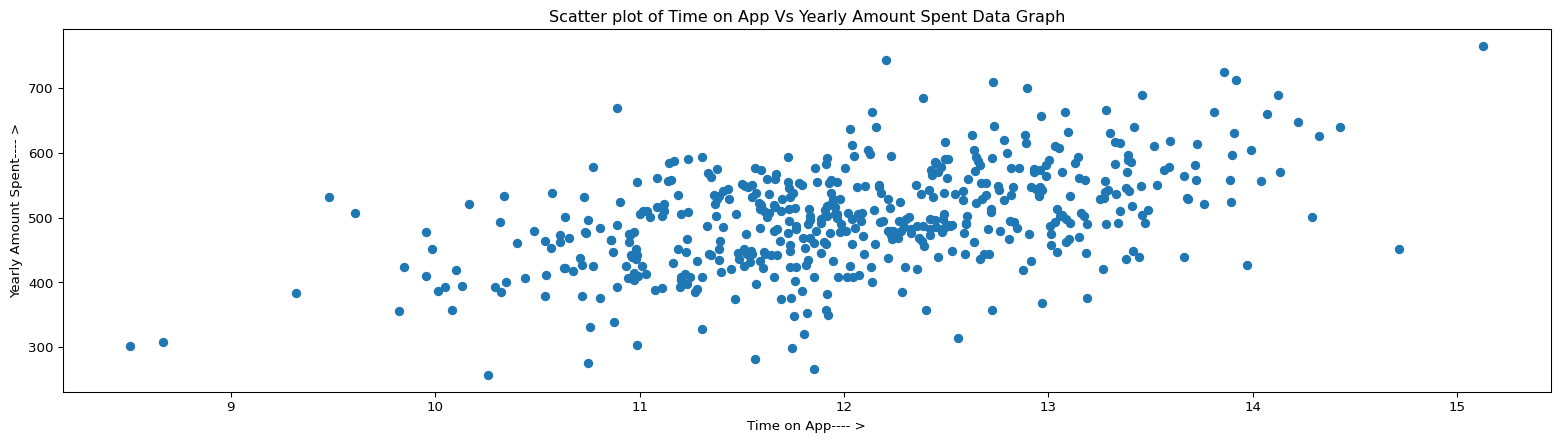

In [ ]:
# Create scatter plot with 'Time on App' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(20,5),dpi = 96)
plt.title("Scatter plot of Time on App Vs Yearly Amount Spent Data Graph")
plt.scatter(x = df['Time on App'],y = df['Yearly Amount Spent'])
plt.xlabel("Time on App---- >")
plt.ylabel("Yearly Amount Spent---- >")
plt.show()

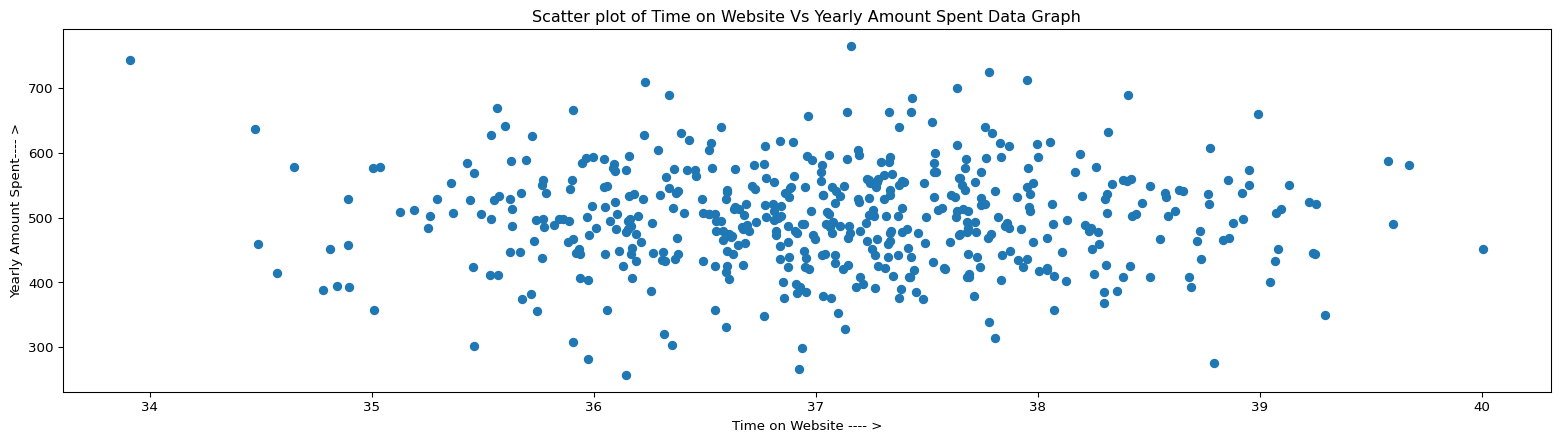

In [ ]:
# Create scatter plot with 'Time on Website' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(20,5),dpi = 96)
plt.title("Scatter plot of Time on Website Vs Yearly Amount Spent Data Graph")
plt.scatter(x = df['Time on Website'],y = df['Yearly Amount Spent'])
plt.xlabel("Time on Website ---- >")
plt.ylabel("Yearly Amount Spent---- >")
plt.show()

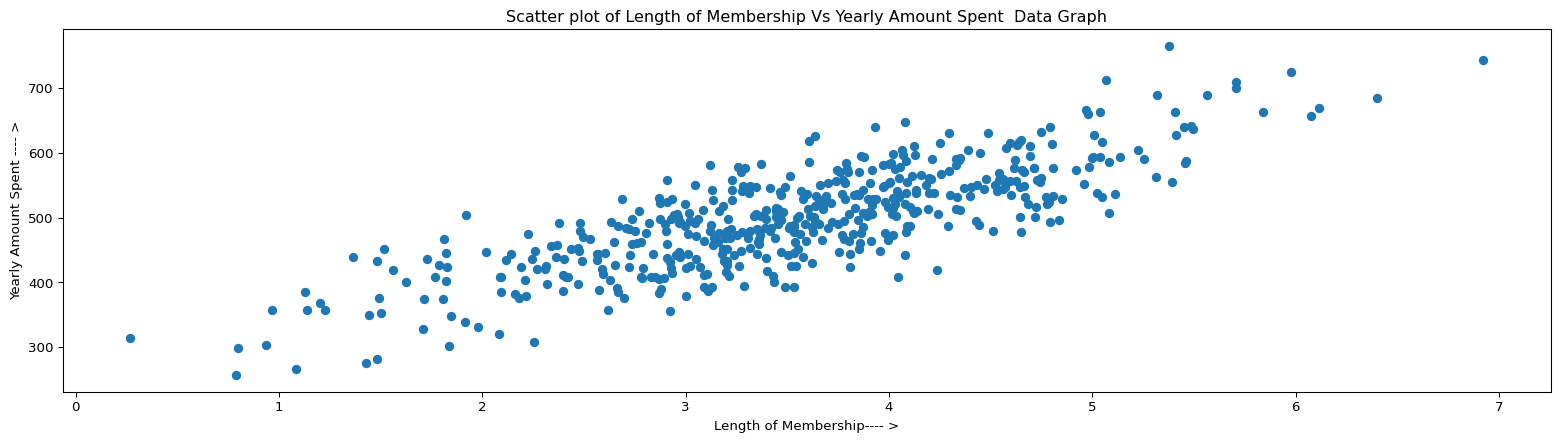

In [ ]:
# Create scatter plot with 'Length of Membership' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(20,5),dpi = 96)
plt.title("Scatter plot of Length of Membership Vs Yearly Amount Spent  Data Graph")
plt.scatter(x = df['Length of Membership'],y = df['Yearly Amount Spent'])
plt.xlabel("Length of Membership---- >")
plt.ylabel("Yearly Amount Spent ---- >")
plt.show()

**Q:** Based on the scatter plots, which independent variable seems to have the best linear relationship with the target variable?

**A:** Scatter plot of Length of Membership Vs Yearly Amount Spent  Data Graph seems to best linear relationship with the target variable.

---

#### Activity 3: Train-Test Split

We need to predict the value of `Yearly Amount Spent` variable, using other variables. Thus, `Yearly Amount Spent` is the target or dependent variable and other columns except `Yearly Amount Spent` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

---

#### Activity 4: Model Training using `statsmodels.api`

Perform the following tasks:
- Implement multiple linear regression using `statsmodels.api` module and find the values of all the regression coefficients using this module.
-Print the statistical summary of the regression model.


In [ ]:
# Build a linear regression model using the 'statsmodels.api' module.
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

  # Add a constant to feature variables
X_train_sm = sm.add_constant(X_train)


  # Fit the regression line using 'OLS'
lin_fit = sm.OLS(y_train, X_train_sm).fit()

  # Print the parameters, i.e. the intercept and the slope of the regression line fitted
lin_fit.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                  -1056.072059
Avg. Session Length       25.706762
Time on App               38.572608
Time on Website            0.625201
Length of Membership      61.717676
dtype: float64

In [ ]:
# Print statistical summary of the model
print(lin_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5600.
Date:                 Thu, 17 Feb 2022   Prob (F-statistic):          8.40e-302
Time:                         03:49:21   Log-Likelihood:                -1241.5
No. Observations:                  335   AIC:                             2493.
Df Residuals:                      330   BIC:                             2512.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 0.095 is the $R^2$ (R-squared) value for this model.


-----

#### Activity 5: Calculate VIF using `variance_inflation_factor`

Calculate the VIF values for each independent variables using the `variance_inflation_factor` function of the `statsmodels.stats.outliers_influence` module.


In [ ]:
# Calculate the VIF values for each independent variable using the 'variance_inflation_factor' function.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.values.shape[1])]
vif['VIF'] = round(vif['VIF'],3)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,2522.106
2,Time on App,1.007
3,Time on Website,1.006
4,Length of Membership,1.004
1,Avg. Session Length,1.001


-------

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project67**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project67** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---